In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

plt.rcParams["font.size"] = 16

from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer
from lightgbm.sklearn import LGBMRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
# import shap

In [3]:
df = pd.read_csv("data/data.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [6]:
print(df.shape)
df.isnull().sum()

(20758, 22)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

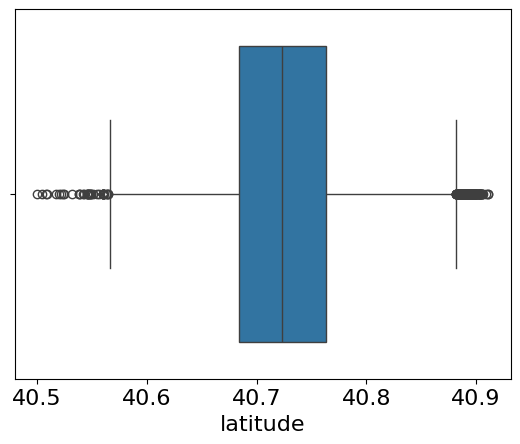

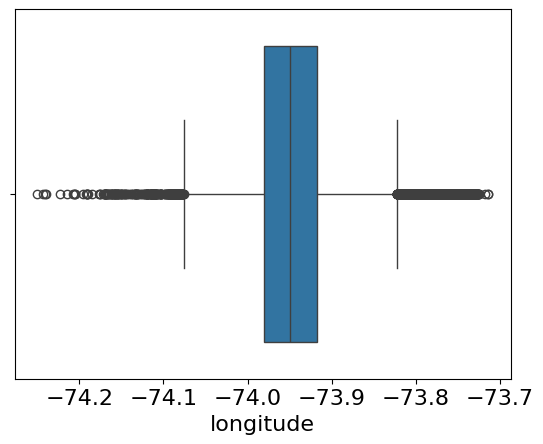

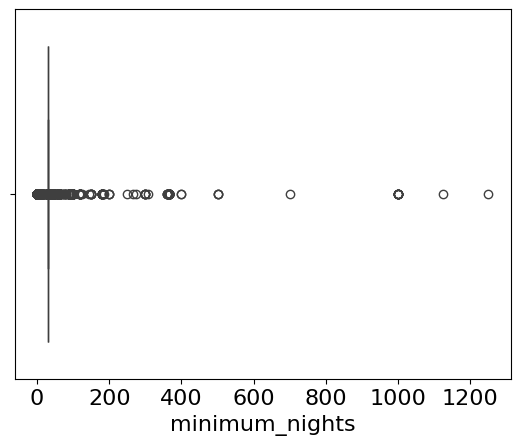

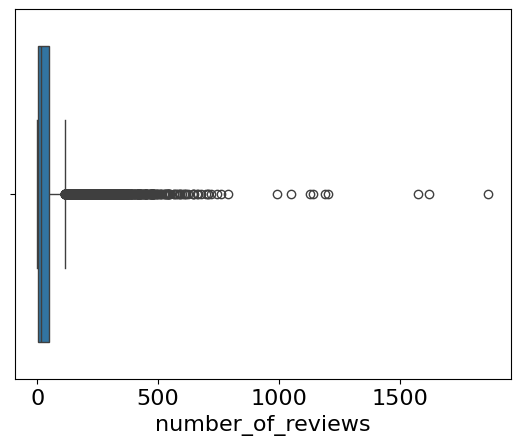

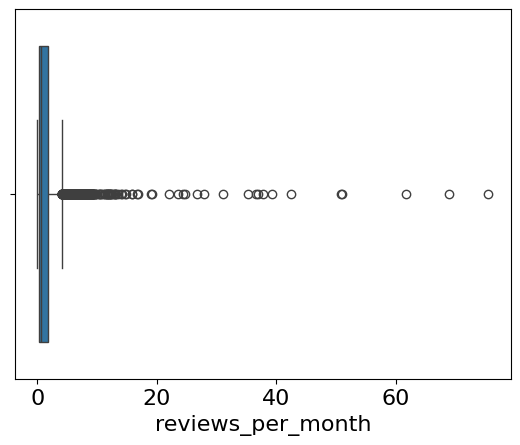

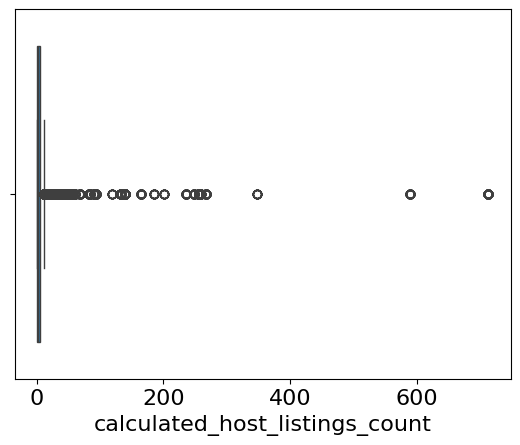

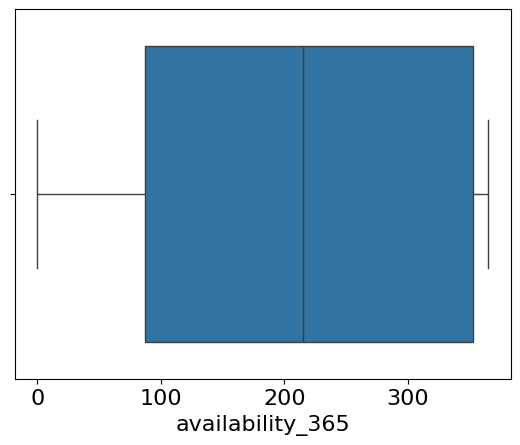

In [8]:
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
for i in numerical_columns:
    plot = sns.boxplot(x=df[i])
    plt.show()

In [9]:
train_df,test_df= train_test_split(df,test_size = 0.3)

X_train = train_df.drop(columns=['price'])
y_train = train_df['price']

X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

We will be dropping id, host_name,latitude, longitude, reviews_per_month, number_of_reviews_ltm, license. 

In [10]:
print(df['room_type'].value_counts())

room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64


In [11]:
numerical_feats = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
categorical_feats = ['neighbourhood_group', 'room_type', "neighbourhood"]
drop_feats = ["id", "host_name","latitude", "longitude", "reviews_per_month", "number_of_reviews_ltm", "license"]

In [12]:
preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output = False, handle_unknown="ignore"), categorical_feats),
    (StandardScaler(), numerical_feats),
    ("drop", drop_feats)
)

In [13]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [14]:
results = {}
base_pipe = make_pipeline(preprocessor, DummyRegressor(strategy = "mean"))

In [15]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False) # since we are scoring using MAPE.

In [16]:
score_dummy = cross_validate(base_pipe, X_train, y_train, cv = 5,return_train_score=True,scoring=mape_scorer)
results["Dummy"] = mean_std_cross_val_scores( base_pipe, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(score_dummy))
pd. DataFrame(results).T


/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_14432/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.092987,0.018894,-0.998984,-1.017738
1,0.111215,0.017411,-1.090900,-1.081325
2,0.112005,0.073829,-1.134830,-1.087530
3,0.125549,0.040114,-1.006464,-1.024151
4,0.044107,0.027068,-1.070785,-1.088296


,fit_time,score_time,test_score,train_score
Dummy,0.039 (+/- 0.011),0.017 (+/- 0.003),-1.060 (+/- 0.058),-1.060 (+/- 0.036)


In [17]:
#Linear
param_grid = {'transformedtargetregressor__regressor__alpha': 10.0 ** np.arange(-5, 5, 1)}
ttr_R = TransformedTargetRegressor(
    Ridge(random_state=123), func=np.log1p, inverse_func=np.expm1
    )
pipe_linear = make_pipeline(preprocessor, ttr_R)
search = RandomizedSearchCV(pipe_linear, param_grid,n_iter=10, n_jobs=-1,return_train_score=True, scoring = mape_scorer)
search.fit(X_train, y_train)
train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]
print("Train scores are:", train_scores)
print("Cross Validation scores are:", cv_scores)


Train scores are: [-0.45198063 -0.45198067 -0.45198102 -0.45198468 -0.45202064 -0.45223619
 -0.45354591 -0.46220672 -0.48180413 -0.54235986]
Cross Validation scores are: [-0.46175034 -0.46175014 -0.46174816 -0.46172856 -0.46155109 -0.4604656
 -0.45894979 -0.46471114 -0.48283462 -0.54283629]


Text(0, 0.5, 'score')

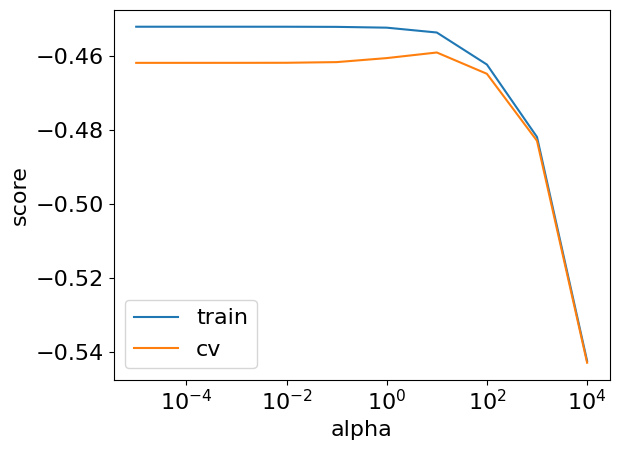

In [18]:
plt.semilogx(param_grid["transformedtargetregressor__regressor__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["transformedtargetregressor__regressor__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("score")

In [19]:
best_alpha = search.best_params_
print(best_alpha)
print("the best score in the linear model for that alpha is : ", search.best_score_)

{'transformedtargetregressor__regressor__alpha': 10.0}
the best score in the linear model for that alpha is :  -0.4589497864198672


In [20]:
ttr_R = TransformedTargetRegressor(
    Ridge(alpha = 1 , random_state=123), func=np.log1p, inverse_func=np.expm1
    )
pipe_linear = make_pipeline(preprocessor, ttr_R)
scores = cross_validate(pipe_linear, X_train, y_train, return_train_score=True, scoring=mape_scorer)
results["LinearModel"] = mean_std_cross_val_scores( pipe_linear, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(scores))
pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_14432/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.716405,0.041393,-0.451265,-0.453498
1,0.189519,0.038239,-0.473372,-0.452048
2,0.107973,0.024841,-0.480312,-0.448193
3,0.132266,0.035349,-0.454095,-0.452541
4,0.120639,0.047685,-0.443284,-0.454900


,fit_time,score_time,test_score,train_score
Dummy,0.039 (+/- 0.011),0.017 (+/- 0.003),-1.060 (+/- 0.058),-1.060 (+/- 0.036)
LinearModel,0.099 (+/- 0.041),0.019 (+/- 0.003),-0.460 (+/- 0.016),-0.452 (+/- 0.003)


In [21]:
#Decision Tree
ttr_DTR = TransformedTargetRegressor(
    DecisionTreeRegressor(random_state=123), func=np.log1p, inverse_func=np.expm1
)
pipe2 = make_pipeline(preprocessor, ttr_DTR)
scores = cross_validate(pipe2, X_train, y_train, return_train_score=True, scoring=mape_scorer)
results["DecisionTreeRegressor"] = mean_std_cross_val_scores( pipe2, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(scores))


/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_14432/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,1.321520,0.021968,-0.640505,-0.010336
1,0.374648,0.018134,-2.250743,-0.009293
2,0.476514,0.023921,-0.750040,-0.009791
3,0.749433,0.035549,-0.632452,-0.009653
4,0.599256,0.015008,-0.672279,-0.010238


In [22]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.039 (+/- 0.011),0.017 (+/- 0.003),-1.060 (+/- 0.058),-1.060 (+/- 0.036)
LinearModel,0.099 (+/- 0.041),0.019 (+/- 0.003),-0.460 (+/- 0.016),-0.452 (+/- 0.003)
DecisionTreeRegressor,0.404 (+/- 0.160),0.020 (+/- 0.004),-0.989 (+/- 0.707),-0.010 (+/- 0.000)


In [23]:
ttr_RFR = TransformedTargetRegressor(
    RandomForestRegressor(n_jobs=-1,random_state=123), func=np.log1p, inverse_func=np.expm1
)
pipe_rf = make_pipeline(
    preprocessor,ttr_RFR
)

results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T


/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_14432/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.039 (+/- 0.011),0.017 (+/- 0.003),-1.060 (+/- 0.058),-1.060 (+/- 0.036)
LinearModel,0.099 (+/- 0.041),0.019 (+/- 0.003),-0.460 (+/- 0.016),-0.452 (+/- 0.003)
DecisionTreeRegressor,0.404 (+/- 0.160),0.020 (+/- 0.004),-0.989 (+/- 0.707),-0.010 (+/- 0.000)
Random forests,10.166 (+/- 2.727),0.091 (+/- 0.026),-0.416 (+/- 0.027),-0.147 (+/- 0.001)


In [24]:
ttr_LGBM = TransformedTargetRegressor(
    LGBMRegressor(random_state=123, verbose=-1), func=np.log1p, inverse_func=np.expm1
)
pipe_lgbm = make_pipeline(
    preprocessor, ttr_LGBM
)


results["LGBM Regressor"] = mean_std_cross_val_scores(
    pipe_lgbm, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_14432/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.039 (+/- 0.011),0.017 (+/- 0.003),-1.060 (+/- 0.058),-1.060 (+/- 0.036)
LinearModel,0.099 (+/- 0.041),0.019 (+/- 0.003),-0.460 (+/- 0.016),-0.452 (+/- 0.003)
DecisionTreeRegressor,0.404 (+/- 0.160),0.020 (+/- 0.004),-0.989 (+/- 0.707),-0.010 (+/- 0.000)
Random forests,10.166 (+/- 2.727),0.091 (+/- 0.026),-0.416 (+/- 0.027),-0.147 (+/- 0.001)
LGBM Regressor,0.204 (+/- 0.077),0.034 (+/- 0.002),-0.398 (+/- 0.020),-0.364 (+/- 0.003)


In [25]:
class MyTransformedTargetRegressor(TransformedTargetRegressor):
    @property
    def feature_importances_(self):
        return self.regressor_.feature_importances_

    @property
    def coef_(self):
        return self.regressor_.coef_

In [26]:
Myttr_R = MyTransformedTargetRegressor(
    Ridge(random_state=123), func=np.log1p, inverse_func=np.expm1
)

rfe_cv = RFECV(Myttr_R, cv=10)

pipe_rfecv = make_pipeline(
    preprocessor,rfe_cv,LGBMRegressor(random_state=123, verbose=-1)
)

results["LGBM with RFECV"] = mean_std_cross_val_scores(
    pipe_rfecv, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_14432/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.039 (+/- 0.011),0.017 (+/- 0.003),-1.060 (+/- 0.058),-1.060 (+/- 0.036)
LinearModel,0.099 (+/- 0.041),0.019 (+/- 0.003),-0.460 (+/- 0.016),-0.452 (+/- 0.003)
DecisionTreeRegressor,0.404 (+/- 0.160),0.020 (+/- 0.004),-0.989 (+/- 0.707),-0.010 (+/- 0.000)
Random forests,10.166 (+/- 2.727),0.091 (+/- 0.026),-0.416 (+/- 0.027),-0.147 (+/- 0.001)
LGBM Regressor,0.204 (+/- 0.077),0.034 (+/- 0.002),-0.398 (+/- 0.020),-0.364 (+/- 0.003)
LGBM with RFECV,79.479 (+/- 21.312),0.048 (+/- 0.013),-0.895 (+/- 0.188),-0.798 (+/- 0.080)


In [27]:
select_CV = SelectFromModel(
    Myttr_R, threshold="median"
)

pipe_select_CV = make_pipeline(
    preprocessor,select_CV,LGBMRegressor(random_state=123, verbose=-1)
)

results["LGBM with SelectFromModel"] = mean_std_cross_val_scores(
    pipe_select_CV, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_14432/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.039 (+/- 0.011),0.017 (+/- 0.003),-1.060 (+/- 0.058),-1.060 (+/- 0.036)
LinearModel,0.099 (+/- 0.041),0.019 (+/- 0.003),-0.460 (+/- 0.016),-0.452 (+/- 0.003)
DecisionTreeRegressor,0.404 (+/- 0.160),0.020 (+/- 0.004),-0.989 (+/- 0.707),-0.010 (+/- 0.000)
Random forests,10.166 (+/- 2.727),0.091 (+/- 0.026),-0.416 (+/- 0.027),-0.147 (+/- 0.001)
LGBM Regressor,0.204 (+/- 0.077),0.034 (+/- 0.002),-0.398 (+/- 0.020),-0.364 (+/- 0.003)
LGBM with RFECV,79.479 (+/- 21.312),0.048 (+/- 0.013),-0.895 (+/- 0.188),-0.798 (+/- 0.080)
LGBM with SelectFromModel,0.373 (+/- 0.087),0.074 (+/- 0.032),-0.858 (+/- 0.084),-0.843 (+/- 0.064)
